In [108]:
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Stats packages
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Packages for date conversions for calculating trip durations
import datetime

# Packages for OLS, MLR, confusion matrix
import sklearn.metrics as metrics # For confusion matrix
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [3]:
df0=pd.read_csv('../Data Sources/2017_Yellow_Taxi_Trip_Data.csv') 

In [4]:
df0.info()
df0.shape

<class 'pandas.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  str    
 3   tpep_dropoff_datetime  22699 non-null  str    
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  str    
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  tolls_amount 

(22699, 18)

In [5]:
df0.drop_duplicates()
df0.isna().astype(int).sum()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [6]:
df0.info()

<class 'pandas.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  str    
 3   tpep_dropoff_datetime  22699 non-null  str    
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  str    
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  tolls_amount 

In [7]:
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

In [8]:
df0.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126,2017-06-29 07:49:49.799726,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295


Adding trip duration in minutes

In [9]:
df0['duration'] = df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']
df0['duration'] = df0['duration'].dt.total_seconds() / 60

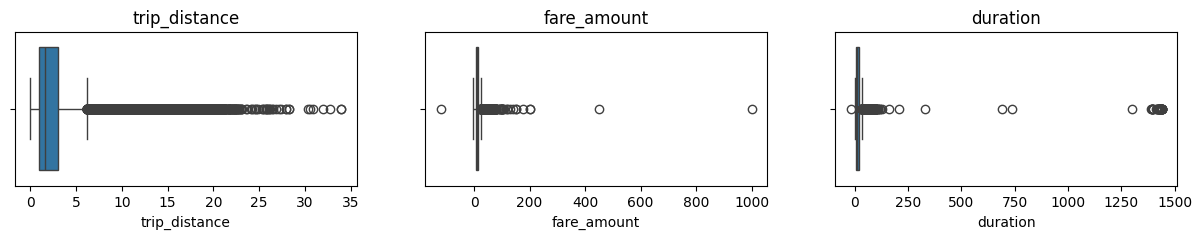

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))

sns.boxplot(ax=axes[0],x=df0['trip_distance'])
axes[0].set_title('trip_distance')

sns.boxplot(ax=axes[1],x=df0['fare_amount'])
axes[1].set_title('fare_amount')

sns.boxplot(ax=axes[2],x=df0['duration'])
axes[2].set_title('duration')

plt.show()

In [15]:

df0[df0['trip_distance']==0]['trip_distance'].count()

np.int64(148)

In [16]:
df0[df0['fare_amount']<=0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.12,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.483333
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,0.616667
4402,108016954,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.06,1,N,263,169,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.950000
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,1.333333
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3,2.216667
5722,49670364,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.266667
8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,2.383333
10281,55302347,2,2017-06-05 17:34:25,2017-06-05 17:36:29,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3,2.066667
10506,26005024,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333


In [21]:
df1 = df0.copy()

df1['fare_amount'] = df0['fare_amount'].apply(lambda x: 0 if x<0 else x)

Outlier handling function

In [20]:
def outlier_capping(df, column_list, iqr_factor=1.5):
    '''
     Function is inputting upper-limit values in specified columns based on their interquartile range.

    '''
    for col in column_list:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + iqr_factor * IQR
            df[col] = df[col].clip(upper=upper_limit)

Based on previous check we need to handle high values in fare amount and duration columns

In [22]:
outlier_capping(df1, ['fare_amount', 'duration'], iqr_factor=6)

In [23]:
df1.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126,2017-06-29 07:49:49.799726,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,14.459807
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,88.783333
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,11.948480


The duration column has problematic values at both the lower and upper extremities.

Low values: There should be no values that represent negative time. Thus we impute all negative durations with 0

In [24]:
df1['duration'] = df1['duration'].apply(lambda x: 0 if x<0 else x)

In [25]:
df1.describe()
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


**Feature enginering**

In [28]:
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + " " + df1['DOLocationID'].astype(str)
grouped = df1.groupby(['pickup_dropoff'])['trip_distance'].mean()

grouped_dict = grouped.to_dict() 
df1['mean_distance'] = df1['pickup_dropoff']

df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

df1.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000


In [29]:
groupped_duration = df1.groupby('pickup_dropoff')['duration'].mean()

duration_dict = groupped_duration.to_dict() 
duration_dict

df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(duration_dict)

df1['mean_duration'].describe()
# df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_duration']]

count    22699.000000
mean        14.460555
std         10.080913
min          0.000000
25%          8.031481
50%         11.556667
75%         17.321667
max         88.783333
Name: mean_duration, dtype: float64

In [33]:
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()

In [35]:
df1['rush_hour'] = np.where(((df1['tpep_pickup_datetime'].dt.hour>=6) & 
                            (df1['tpep_pickup_datetime'].dt.hour<10)) | 
                            ((df1['tpep_pickup_datetime'].dt.hour>=16) &
                            (df1['tpep_pickup_datetime'].dt.hour<20)), 1, 0)

df1.loc[df1['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0


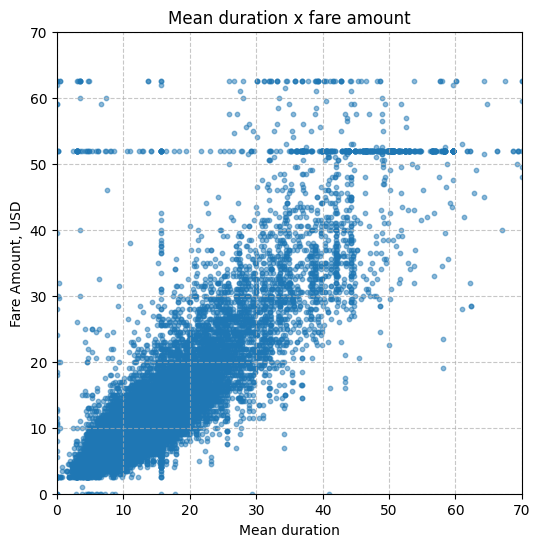

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df1['mean_duration'], df1['fare_amount'], alpha=0.5, s=10)
plt.xlabel('Mean duration')
plt.ylabel('Fare Amount, USD')
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
ax.grid(True, linestyle='--', alpha=0.7)

In [44]:
pd.set_option('display.max_columns', None)
df1[df1['fare_amount']==52].head(30)

print(f"{(df1[df1['fare_amount'] == 52]['fare_amount'].count() / df1.shape[0]) * 100:.2f}%")

2.26%


Mean duration and fare amount have visible strong correlation. Hovewer, there 2 horisontal lines around 52 USD and 63 USD. Dataset contains 2% trips with flat fare.
It seems those are trips from/to JFK airoport and probably they have fix fare in 2017 of $52. The second line was created after addressing outliers; all values above the 99.9th percentile were imputed as 63 USD

In [47]:
df2 = df1[['RatecodeID', 'fare_amount', 'VendorID', 
          'mean_distance', 'mean_duration', 'day', 'rush_hour']]

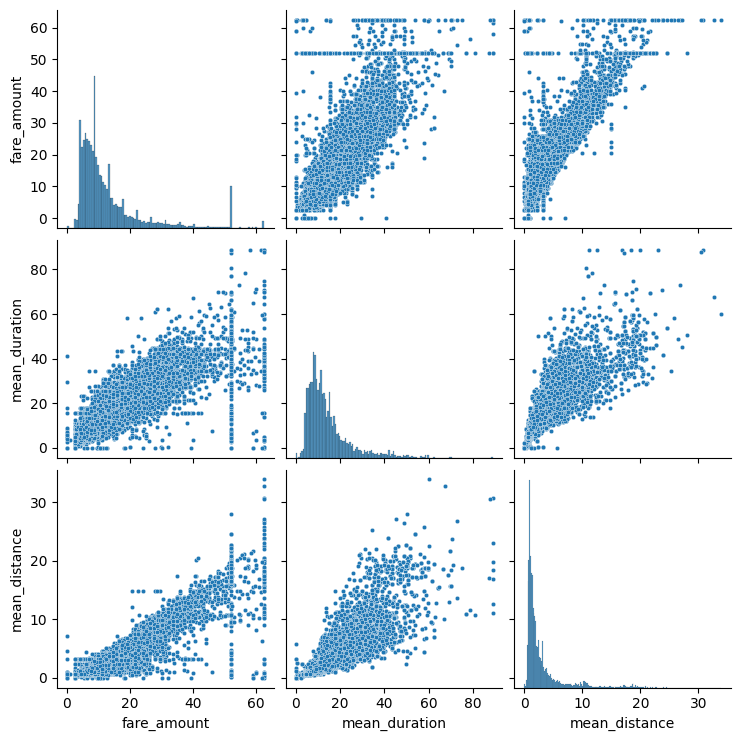

In [51]:
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']], plot_kws={'s': 10})

In [53]:
df2.corr(method='pearson', numeric_only=True)

,RatecodeID,fare_amount,VendorID,mean_distance,mean_duration,rush_hour
RatecodeID,1.000000,0.222102,-0.002991,0.159353,0.111667,0.006494
fare_amount,0.222102,1.000000,0.001045,0.910185,0.859105,-0.020075
VendorID,-0.002991,0.001045,1.000000,0.004741,0.001876,-0.002874
mean_distance,0.159353,0.910185,0.004741,1.000000,0.874864,-0.039725
mean_duration,0.111667,0.859105,0.001876,0.874864,1.000000,-0.021583
rush_hour,0.006494,-0.020075,-0.002874,-0.039725,-0.021583,1.000000


Fare amount highly correlates with mean distance and mean trip duration, 0.91 & 0.86 respectfully

Text(0.5, 1.0, 'Correlation heatmap')

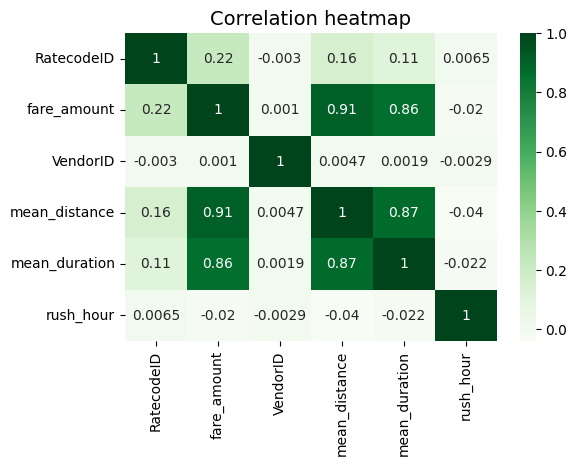

In [62]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson', numeric_only=True), annot=True, cmap='Greens')
plt.title("Correlation heatmap", fontsize=14)

In [79]:
X = df2.drop(columns='fare_amount')
y = df2['fare_amount']
X.head()

,RatecodeID,VendorID,mean_distance,mean_duration,day,rush_hour
0,1,2,3.521667,22.847222,Saturday,0
1,1,1,3.108889,24.470370,Tuesday,0
2,1,1,0.881429,7.250000,Friday,1
3,1,2,3.700000,30.250000,Sunday,0
4,1,2,4.435000,14.616667,Saturday,0


Creating dummy variables for VendorID & weekday

In [80]:
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X, columns=['VendorID','day'], drop_first=True).astype(int)
X.head()


,RatecodeID,mean_distance,mean_duration,rush_hour,VendorID_2,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1,3,22,0,1,0,1,0,0,0,0
1,1,3,24,0,0,0,0,0,0,1,0
2,1,0,7,1,0,0,0,0,0,0,0
3,1,3,30,0,1,0,0,1,0,0,0
4,1,4,14,0,1,0,1,0,0,0,0


Check for Model assumptions:  

**Multicolinearity** occurs when two or more independent variables (predictors) in a regression model are highly correlated with each other. This means they provide redundant information, making it difficult for the model to determine the individual effect of each variable on the outcome.  

Here we will use VIF (variance inflation factor) for predictors.

In [81]:
X = X[['mean_distance', 'mean_duration', 'VendorID_2', 'rush_hour', 'RatecodeID', 'day_Wednesday',
        'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday']]
X['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

          feature        VIF
11      intercept  14.184808
0   mean_distance   4.295949
1   mean_duration   4.232958
7    day_Saturday   1.805792
8      day_Sunday   1.734763
9    day_Thursday   1.697914
5   day_Wednesday   1.695776
10    day_Tuesday   1.664872
6      day_Monday   1.621217
3       rush_hour   1.199959
4      RatecodeID   1.029778
2      VendorID_2   1.000345


All predictors have VIF less than threshold of 5. While distance and duration are strongly correlated (r=0.85), VIF analysis confirms they provide distinct, stable contributions to the fare calculation

Next step is to split dataset to train and test. In this case it will be 20% for test.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Standartization of predictors

In [85]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.67234114 -0.9942494  -1.12136478 ... -0.41900844 -0.40538501
   0.        ]
 [-0.39071531 -0.69343842  0.89177047 ... -0.41900844 -0.40538501
   0.        ]
 [ 0.17253633  0.00845387  0.89177047 ... -0.41900844 -0.40538501
   0.        ]
 ...
 [-0.67234114 -0.79370875 -1.12136478 ... -0.41900844 -0.40538501
   0.        ]
 [ 0.17253633  0.71034616  0.89177047 ... -0.41900844 -0.40538501
   0.        ]
 [-0.39071531 -0.39262744 -1.12136478 ... -0.41900844 -0.40538501
   0.        ]]


**Model fit**

In [86]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


**Model evaluation**

In [87]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8506269770544413
R^2: 0.8506269770544413
MAE: 2.2033026654668624
MSE: 16.339255248842218
RMSE: 4.04218446496968


In [88]:
X_test_scaled = scaler.transform(X_test)

In [89]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8518633694413997
R^2: 0.8518633694413997
MAE: 2.2239258023778485
MSE: 17.477484154304484
RMSE: 4.180608108194845


Model explains 85% of the variance in fare amounts. On average, our predictions are off by about 2.20 USD.  
Root Mean Square Error is higher than MAE (4.04$ vs 2.20$) meaning that we have high outliers - mosl likely those 52 USD and  63 USD values. 

In [90]:
results = pd.DataFrame(data = {"actual": y_test,
                              "predicted": y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5137,4.0,4.821286,-0.821286
19624,4.5,6.035455,-1.535455
11167,9.5,10.809794,-1.309794
2896,4.5,5.379382,-0.879382
22492,13.0,11.142063,1.857937


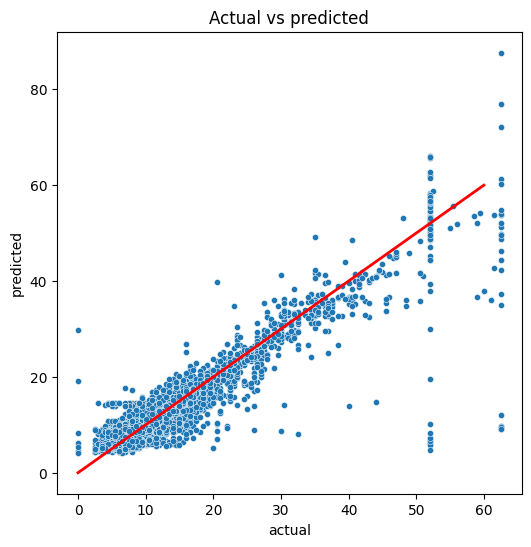

In [91]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.scatterplot(x='actual', y='predicted', data=results, s=20)
ax.set_title("Actual vs predicted")

plt.plot([0,60], [0,60], c='red', linewidth=2)

Text(0.5, 1.0, 'Residuals distribution')

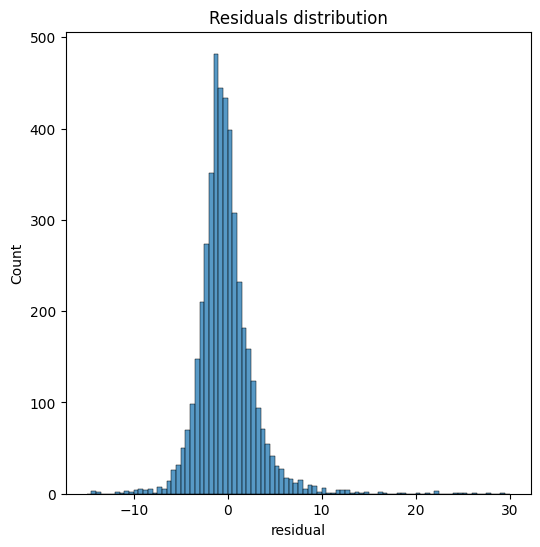

In [92]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(results['residual'], bins=np.arange(-15,30.5,0.5))
ax.set_title("Residuals distribution")

In [93]:
print(results['residual'].mean())

-0.036822419193656246


Text(0.5, 1.0, 'Residuals vs Predicted values')

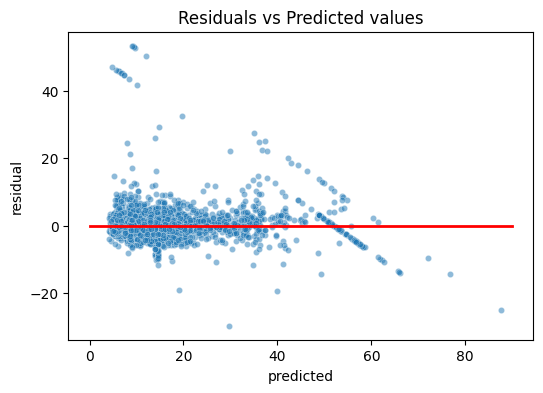

In [94]:
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot( x='predicted', y='residual', data=results, s=20, alpha=0.5)
plt.plot([0,90], [0,0], c='red', linewidth=2)
ax.set_title("Residuals vs Predicted values")

In [95]:
coefficients = pd.DataFrame(lr.coef_.flatten(), index=X.columns, columns=['Coefficient'])
coefficients

stds = scaler.scale_

original_units_coef = lr.coef_.flatten() / stds

stakeholder_summary = pd.DataFrame({
    'Feature': X.columns,
    'Impact_per_Unit': original_units_coef
})
print(stakeholder_summary)

base_fare = lr.intercept_ - np.sum(original_units_coef * scaler.mean_)

print(f"The starting base fare is: ${base_fare:.2f}")

          Feature  Impact_per_Unit
0   mean_distance         1.897717
1   mean_duration         0.303542
2      VendorID_2        -0.059175
3       rush_hour         0.127092
4      RatecodeID         1.136989
5   day_Wednesday        -0.012518
6      day_Monday        -0.497274
7    day_Saturday        -0.289804
8      day_Sunday        -0.527730
9    day_Thursday         0.065553
10    day_Tuesday        -0.085569
11      intercept         0.000000
The starting base fare is: $3.09


The highest impact on the fare amount has mean distance, with in crease by 1 mile fare increases by 1.89 USD, duration is also quite impacful +0.30 USD for each additional minute of the trip.  

During rush hour fare amount usually increased by 0.13 USD.  
It's visible that taxi service has weekly seasonality, Friday price is higher in avg that other day of the week except Thu and Wed. Fare amount during other weekday is lower: Sat (-0.29USD) , Sun (-0.53 USD), Mon (-0.50USD) or Tue (-0.09 USD).

**Model equation**

In [97]:

# Fare = base_fare + ($1.94 * Miles) + ($0.29 * Minutes) + (Day Adjustments) + error

**Prediction on full dataset**

In [111]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [126]:
final_preds = df2[['RatecodeID']].copy()
final_preds['y_preds_full'] = y_preds_full
 
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [127]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))
# mape = mean_absolute_percentage_error(y_true_filtered, y_pred_filtered)
# print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

R^2: 0.8941828599412764
MAE: 2.0245670219993865
MSE: 11.75741438750048
RMSE: 3.4289086292143276


By manually setting those to 52, we removed the biggest source of "noise," allowing the R^2 to climb toward 0.89.  
An MAE decreased to $2.02. The drop in RMSE is from 4.18 to 3.43.

In [106]:
nyc_preds_means = df2[['mean_duration', 'mean_distance', 'fare_amount']].copy()
nyc_preds_means['predicted_fare'] = final_preds
nyc_preds_means['residuals'] = nyc_preds_means['fare_amount'] - final_preds
nyc_preds_means.head()

,mean_duration,mean_distance,fare_amount,predicted_fare,residuals
0,22.847222,3.521667,13.0,16.253952,-3.253952
1,24.470370,3.108889,16.0,17.124447,-1.124447
2,7.250000,0.881429,6.5,6.483740,0.016260
3,30.250000,3.700000,20.5,18.444364,2.055636
4,14.616667,4.435000,16.5,15.723333,0.776667


<Axes: xlabel='predicted_fare', ylabel='residuals'>

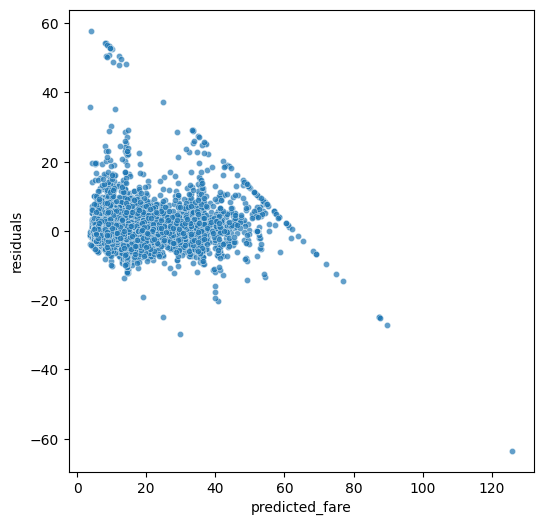

In [107]:
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x='predicted_fare', y='residuals', data = nyc_preds_means, s=20, alpha = 0.7)